<a href="https://colab.research.google.com/github/4232177191/project1/blob/main/deiabet1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

In [2]:
#بارگذاری دیتا ست diabetes
diabet=load_diabetes()
data=pd.DataFrame(diabet.data ,columns=diabet.feature_names)
data["target"]=diabet.target
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [3]:
data.shape

(442, 11)

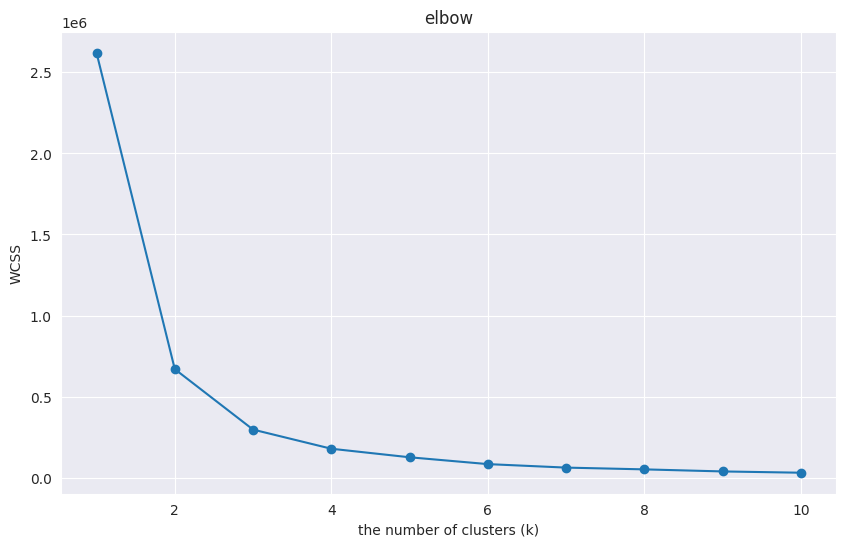

the optimal number of clustters: 8


In [4]:
#روش اول Kmean
#پیدا کردن kمناسب با استفده از elbow

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from seaborn import set_style
set_style('darkgrid')


wcss = []  # مجموع مربعات درون کلاسترها
max_k = 10  # حداکثر تعداد کلاسترها

for k in range(1, max_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)  # ذخیره مجموع مربعات درون کلاسترها

# رسم نمودار روش آرنج
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_k + 1), wcss, marker='o')
plt.title('elbow')
plt.xlabel('the number of clusters (k)')
plt.ylabel('WCSS')
plt.show()



# محاسبه نقطه عطف  به صورت خودکار
diff = np.diff(wcss)
diff2 = np.diff(diff)

# پیدا کردن نقطه عطف
optimal_k = np.argmin(diff2) + 2  # +2 برای تنظیم ایندکس به تعداد کلاستر


# چاپ تعداد کلاستر بهینه
print(f"the optimal number of clustters: {optimal_k}")


#  K-Means با تعداد کلاسترهای بهینه
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
kmeans.fit(data)

# اضافه کردن برچسب کلاستر به داده‌ها
data['Cluster'] = kmeans.labels_



In [5]:
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target,Cluster
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0,2
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0,0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0,2
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0,3
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0,2


In [6]:
#row del
cleaned_df=data.dropna()
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      442 non-null    float64
 1   sex      442 non-null    float64
 2   bmi      442 non-null    float64
 3   bp       442 non-null    float64
 4   s1       442 non-null    float64
 5   s2       442 non-null    float64
 6   s3       442 non-null    float64
 7   s4       442 non-null    float64
 8   s5       442 non-null    float64
 9   s6       442 non-null    float64
 10  target   442 non-null    float64
 11  Cluster  442 non-null    int32  
dtypes: float64(11), int32(1)
memory usage: 39.8 KB


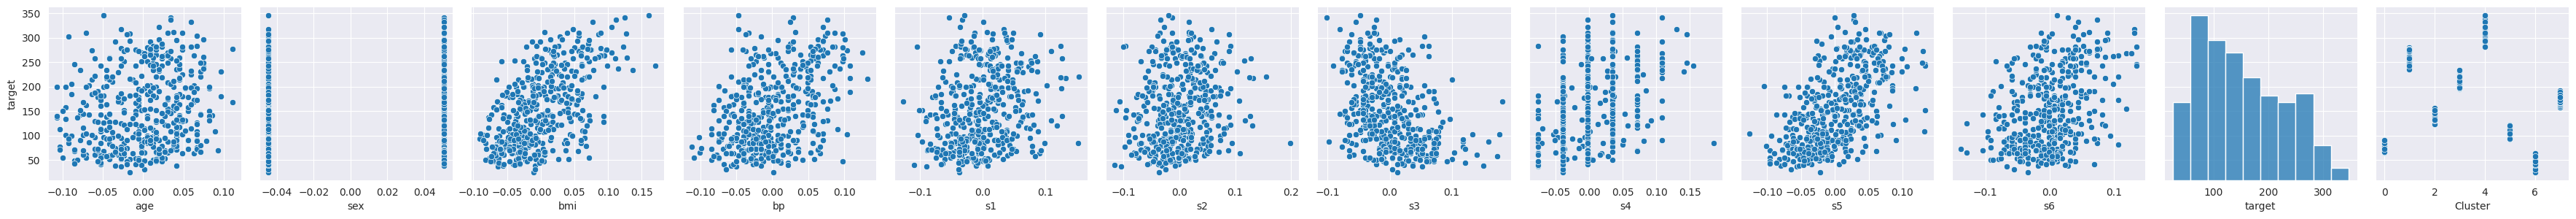

In [7]:
import seaborn as sns
import  matplotlib.pyplot as plt


sns.pairplot(data,  y_vars=['target']  , x_vars = data.columns , height=3 )
plt.show()

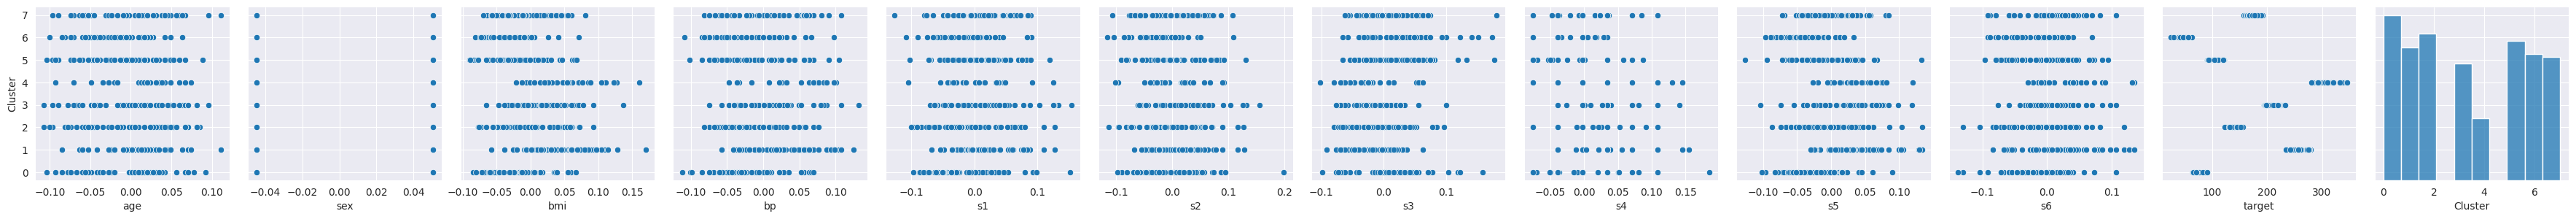

In [8]:
sns.pairplot(data,  y_vars=['Cluster']  , x_vars = data.columns , height=3 )
plt.show()

In [9]:
import seaborn as sns
from sklearn.linear_model import LinearRegression

# تبدیل به لیست
features =data.columns.tolist()

# نمایش نام ستون‌ها به عنوان یک لیست
print(features)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'target', 'Cluster']


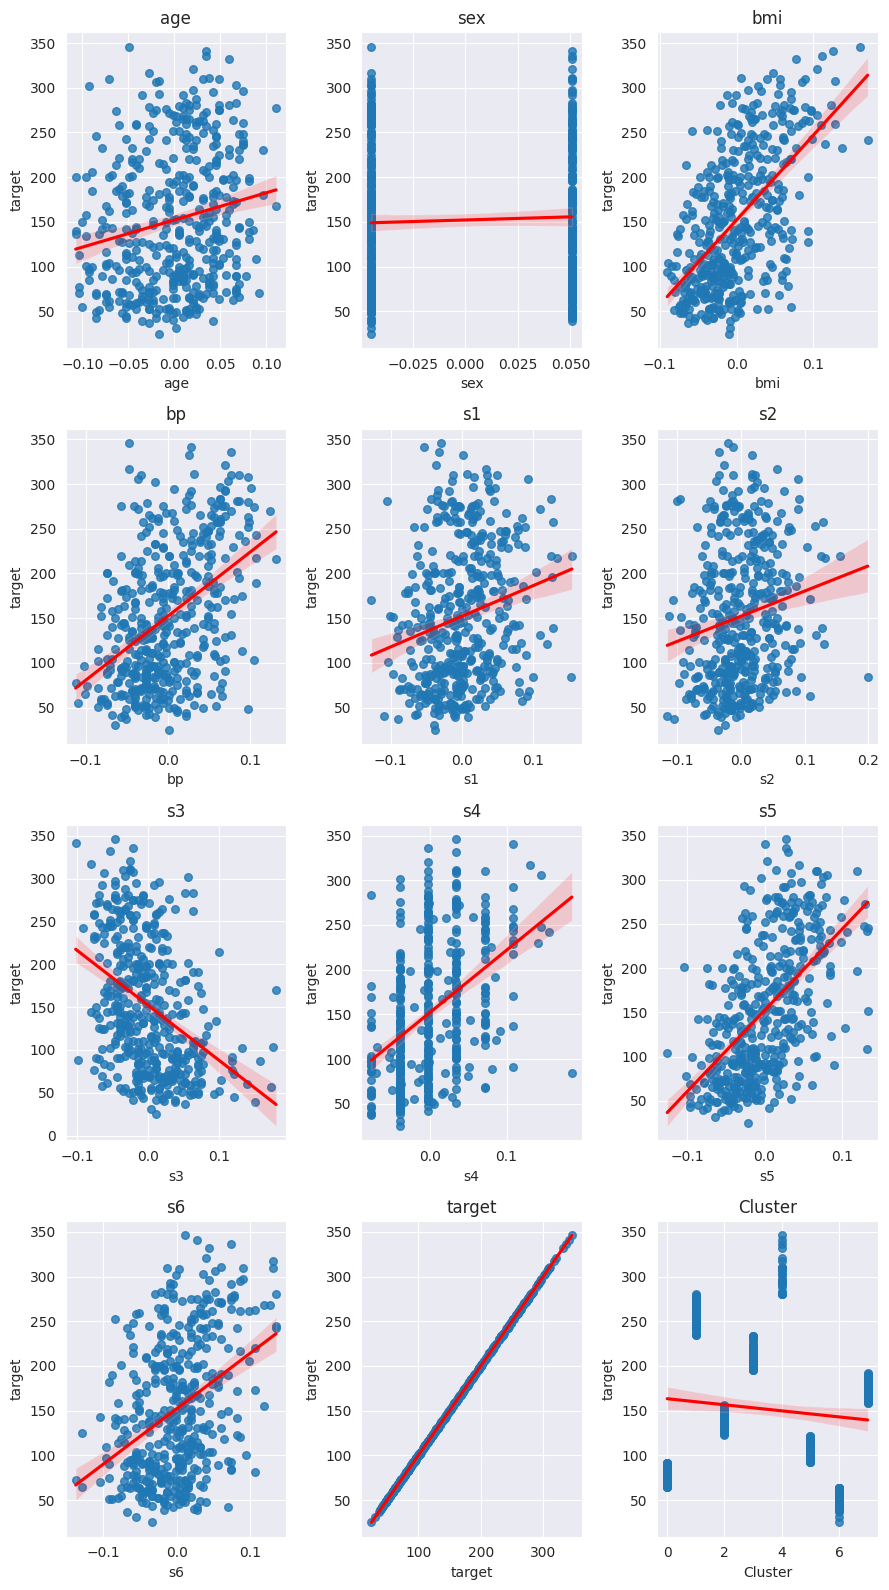

In [10]:
n_features = len(features)
n_rows = 4
n_cols = 3

fig, axes = plt.subplots(n_rows, n_cols,  figsize=(n_cols * 3, n_rows * 4), squeeze=False)

# Flatten the axes array for easier iteration
axes_flat = axes.flatten()

# Loop through each feature and plot scatter + regression line
for i, feature in enumerate(features):
    ax = axes_flat[i]

    # Scatter plot with regression line
    sns.regplot(data=data, x=feature, y='target', ax=ax, scatter_kws={"s": 30}, line_kws={"color": "red"})
    ax.set_title(feature)

# Hide any unused subplots
for j in range(i + 1, len(axes_flat)):
    axes_flat[j].set_visible(False)

plt.tight_layout()
plt.show()

In [11]:
data[features].corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target,Cluster
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889,-0.116875
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062,-0.052565
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450,-0.103483
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482,-0.069796
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022,-0.029382
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054,-0.025619
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789,0.114170
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453,-0.112335
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883,-0.110340
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483,-0.001964


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

X1 = data.drop('target', axis=1)
X=X1.drop('Cluster', axis=1)
y = data['target']  # ستون هدف

# تقسیم‌بندی داده‌ها به مجموعه آموزش و تست
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.13, random_state=0)

# ایجاد مدل KNN
k = int(np.sqrt(len(y_train)))  # تعداد همسایه‌ها
knn = KNeighborsRegressor(n_neighbors=k)

# آموزش مدل
knn.fit(X_train, y_train)

# پیش‌بینی
y_pred = knn.predict(X_test)

# محاسبه خطای میانگین مربعات
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# ایجاد مدل رگرسیون خطی
linear_model = LinearRegression()

# آموزش مدل
linear_model.fit(X_train, y_train)

# پیش‌بینی
y_pred = linear_model.predict(X_test)

# محاسبه خطای میانگین مربعات
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')



Mean Squared Error: 3031.242382271468
Mean Squared Error: 2863.4579020153615
